In [3]:
import discopy
import lambeq
from discopy.grammar.pregroup import Ty, Word, Cup, Diagram
from discopy.quantum import Circuit, sqrt, Ket, H, Rx, CX, SWAP,Bra
from pytket.extensions.qiskit import tk_to_qiskit, AerBackend
import numpy as np
from discopy import CircuitFunctor, qubit
from collections import defaultdict
from nltk.tokenize import word_tokenize
from random import shuffle
from lambeq import BobcatParser, rewrite

In [4]:
parser = BobcatParser()

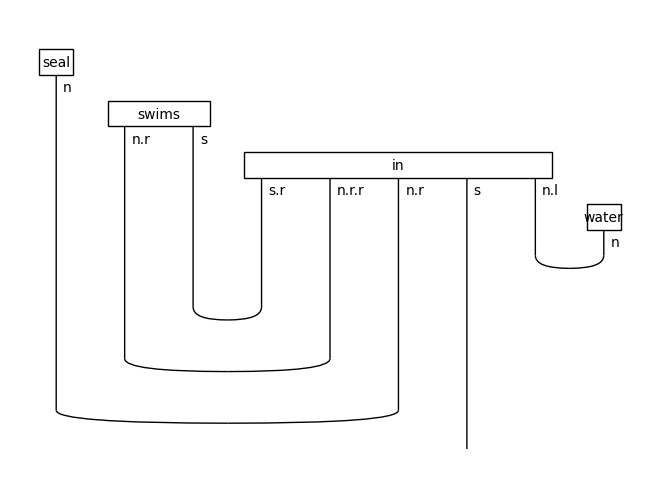

In [12]:
sentence = 'seal swims in water'
#params = {'cat' : 0.1, 'chases' : 0.1, 'after' : 0.1, 'fox':0.1}
# Get a string diagram

diagram = parser.sentence2diagram(sentence)
diagram.draw()

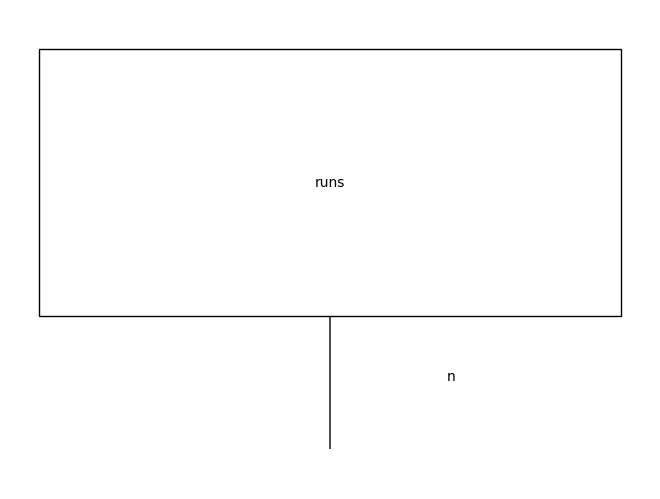

In [11]:
from lambeq import remove_cups

d = remove_cups(diagram).draw()

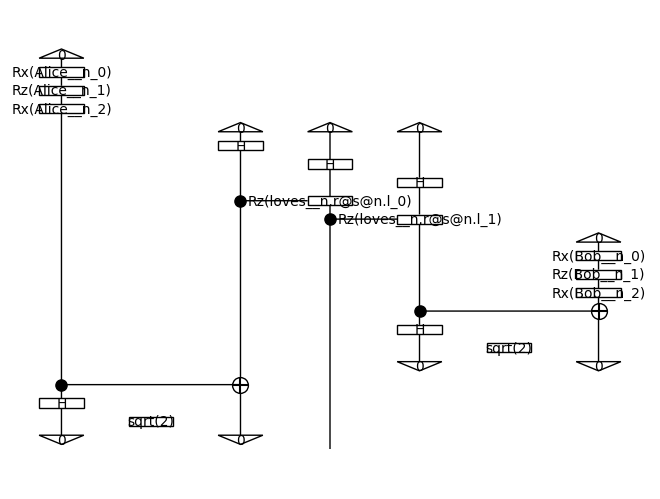

In [39]:
from lambeq import AtomicType
from lambeq import IQPAnsatz
from discopy.quantum import Circuit, sqrt, Ket, H, Rx, CX, SWAP,Bra, Rz, X, Id
from pytket.extensions.qiskit import tk_to_qiskit, AerBackend
# Define atomic types
N = AtomicType.NOUN
S = AtomicType.SENTENCE
P = AtomicType.PREPOSITIONAL_PHRASE

# Convert string diagram to quantum circuit
ansatz = IQPAnsatz(ob_map={N: 1, S: 1, P:1}, n_layers=1, n_single_qubit_params=3, discard=False)
discopy_circuit = ansatz(diagram)
discopy_circuit.draw()

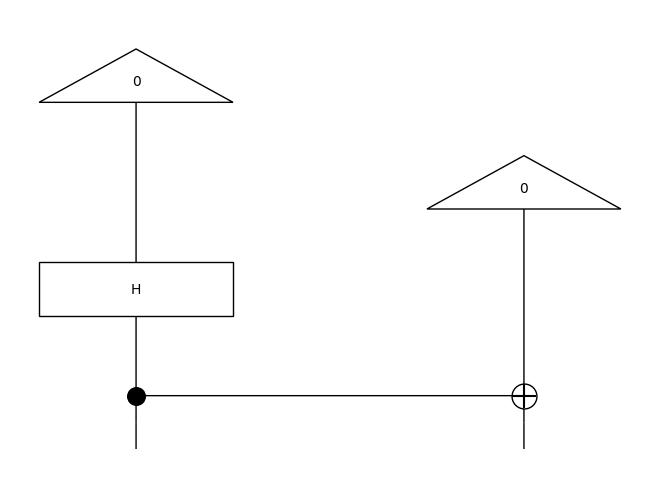

In [26]:
c = Ket(0) @ Ket(0) >> H@Id(qubit) >> CX
c.draw()

In [9]:
from pytket.extensions.qiskit import tk_to_qiskit, AerBackend
tk_circ = discopy_circuit.to_tk()
print(tk_to_qiskit(tk_circ))

     ┌────────────────────┐                              »
q_0: ┤ Rx(2*π*Alice__n_0) ├──────────────────────────────»
     └───────┬───┬────────┘                              »
q_1: ────────┤ H ├───────────────────────■───────────────»
             ├───┤         ┌─────────────┴──────────────┐»
q_2: ────────┤ H ├─────────┤ Rz(2*π*loves__n.r@s@n.l_0) ├»
             ├───┤         └────────────────────────────┘»
q_3: ────────┤ H ├───────────────────────────────────────»
      ┌──────┴───┴───────┐                               »
q_4: ─┤ Rx(2*π*Bob__n_0) ├───────────────────────────────»
      └──────────────────┘                               »
c: 4/════════════════════════════════════════════════════»
                                                         »
«                                   ┌───┐          ┌─┐   
«q_0: ──────────────■───────────────┤ H ├──────────┤M├───
«                 ┌─┴─┐             └┬─┬┘          └╥┘   
«q_1: ────────────┤ X ├──────────────┤M├────────────╫────
«

In [1]:
from scipy.optimize import fmin_cobyla
def objective(x):
    return (x[0]-x[1])*2
fmin_cobyla(objective, (0.0,0.1))


TypeError: fmin_cobyla() missing 1 required positional argument: 'cons'

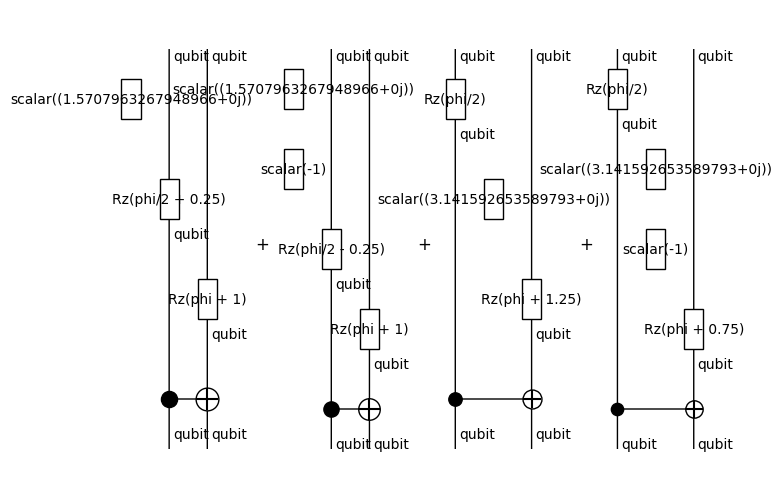

In [46]:
from sympy.abc import phi
from discopy.quantum import *
circuit = Rz(phi / 2) @ Rz(phi + 1) >> CX
circuit.grad(phi).draw()

In [6]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

qc = QuantumCircuit(2)
qc.x(1)

# You can reverse the order of the qubits.

from qiskit.quantum_info import DensityMatrix

matrix = DensityMatrix(qc)
plt = plot_bloch_multivector(matrix, title='', reverse_bits=True)
plt.savefig('filename.png', dpi=700)

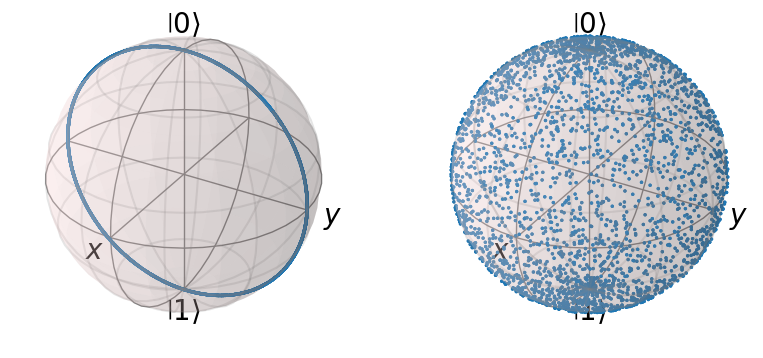

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit import QuantumCircuit, Parameter
from qiskit.circuit import ParameterVector

# First, we need to define the circuits:
theta_param = Parameter('θ')
phi_param = Parameter('Φ')
psi_param = Parameter('psi')

# Circuit A
qc_A = QuantumCircuit(1)
#qc_A.h(0)
qc_A.rx(theta_param, 0)

# Circuit B
qc_B = QuantumCircuit(1)
#qc_B.h(0)
qc_B.rz(theta_param, 0)
qc_B.rx(phi_param, 0)
qc_B.rz(theta_param, 0)

# Next we uniformly sample the parameter space for the two parameters theta and phi
np.random.seed(0)
num_param = 3000
theta = [2*np.pi*np.random.uniform() for i in range(num_param)]
phi = [2*np.pi*np.random.uniform() for i in range(num_param)]


# Then we take the parameter value lists, build the state vectors corresponding
# to each circuit, and plot them on the Bloch sphere:
from qiskit.visualization.bloch import Bloch
from qiskit.quantum_info import Statevector

def state_to_bloch(state_vec):
    # Converts state vectors to points on the Bloch sphere
    phi = np.angle(state_vec.data[1])-np.angle(state_vec.data[0])
    theta = 2*np.arccos(np.abs(state_vec.data[0]))
    return [np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)]

# Bloch sphere plot formatting
width, height = plt.figaspect(1/2)
fig=plt.figure(figsize=(width, height))
ax1, ax2 = fig.add_subplot(1, 2, 1, projection='3d'), fig.add_subplot(1, 2, 2, projection='3d')
b1,b2 = Bloch(axes=ax1), Bloch(axes=ax2)
b1.point_color, b2.point_color = ['tab:blue'],['tab:blue']
b1.point_marker, b2.point_marker= ['o'],['o']
b1.point_size, b2.point_size=[2],[2]

# Calculate state vectors for circuit A and circuit B for each set of sampled parameters
# and add to their respective Bloch sphere
for i in range(num_param):
    state_1=Statevector.from_instruction(qc_A.bind_parameters({theta_param:theta[i]}))
    state_2=Statevector.from_instruction(qc_B.bind_parameters({theta_param:theta[i], phi_param:phi[i]}))
    b1.add_points(state_to_bloch(state_1))
    b2.add_points(state_to_bloch(state_2))

b1.show()
b2.show()

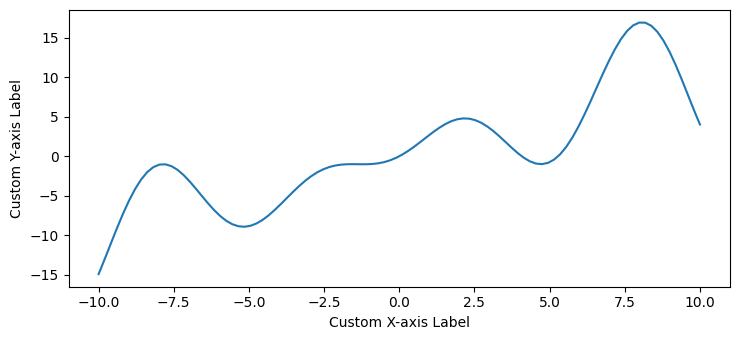

In [5]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

def f(x):
   return np.sin(x) + x + x * np.sin(x)

x = np.linspace(-10, 10, 100)

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the data
ax.plot(x, f(x))

# Set labels for the x and y axes
ax.set_xlabel('Custom X-axis Label')
ax.set_ylabel('Custom Y-axis Label')

# Display the plot
plt.show()

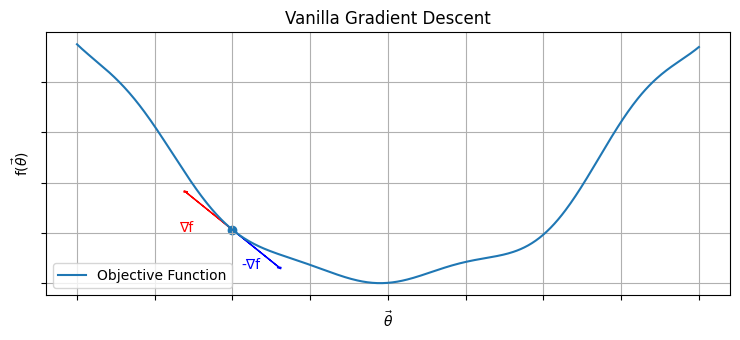

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function
def objective_function(x):
    return x**2 + np.sin(x) + x*np.sin(x)

# Define the derivative of the objective function
def derivative(x):
    return 2*x + 5*np.cos(x)

# Plot the objective function
x = np.linspace(-10, 10, 500)
y = objective_function(x)

plt.plot(x, y, label='Objective Function', )

# Plot the steps of gradient descent
#plt.scatter(x_values, y_values, color='red', label='Gradient Descent Steps')

prop = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",
            shrinkA=0,shrinkB=0)

plt.xlabel('$\\vec{\\theta}$')
plt.ylabel('f($\\vec{\\theta}$)')
plt.title('Vanilla Gradient Descent')
#plt.annotate("", xy=(-1.5,15), xytext=(5,f(-5)), arrowprops=prop)
#plt.annotate("", xy=(.2,.5), xytext=(0,0), arrowprops=prop)
plt.arrow(-5,objective_function(-5),-1.5,15, color='red',head_width=0.13, head_length=0.49)
plt.arrow(-5,objective_function(-5),1.5,-15, color='blue',head_width=0.13, head_length=0.49)
plt.scatter(-5,objective_function(-5))
plt.legend()
plt.text(-6.5, 22, '∇f', ha='center', va='center', color='red')
plt.text(-4.42, 7, '-∇f', ha='center', va='center', color='blue')
plt.grid(True)
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
frame1.axes.yaxis.set_ticklabels([])
plt.savefig('vanilla_grad_desc.png', dpi=300)

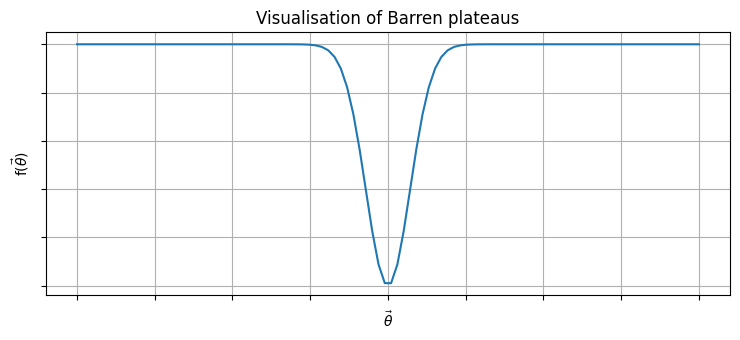

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of x values
x = np.linspace(-10, 10, 100)

# Compute the function values for exp(-x^2)
y = -np.exp(-x**2)

# Create the plot
plt.plot(x, y)
plt.xlabel('$\\vec{\\theta}$')
plt.ylabel('f($\\vec{\\theta}$)')
plt.title('Visualisation of Barren plateaus')
plt.grid(True)
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
frame1.axes.yaxis.set_ticklabels([])
# Display the plot
plt.savefig('Visualisation of Barren plateaus.png', dpi=300)

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)

state = Statevector(qc)
plot_bloch_multivector(state)

In [ ]:
import Convex, SCS
import TikzPictures

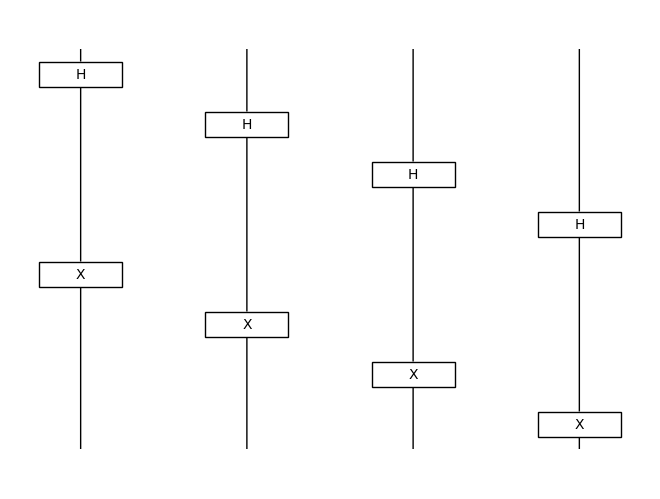

In [5]:
from discopy.quantum.circuit import (Circuit, Discard, Functor, Id,
                                     IQPansatz as IQP, qubit,
                                     Sim14ansatz as Sim14,
                                     Sim15ansatz as Sim15)
from discopy.quantum.gates import Bra, H, Ket, Rx, Ry, Rz, CX, Controlled, X

c = H @ H @ H @ H
c >>= X @ X @ X @ X
c.draw()